# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from utils import get_dataset
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
#dataset = get_dataset("PROCESSED TF RECORD PATH")
dataset = get_dataset('/home/workspace/data/waymo/training_and_validation/*')

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/waymo/training_and_validation/*']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/waymo/training_and_validation/*']
INFO:tensorflow:Number of filenames to read: 97
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [3]:
dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    plt.figure()
    img = batch['image'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    boxes = batch['groundtruth_boxes'].numpy()
    h,w,c = img.shape
    boxes[:,(0,2)] *= h
    boxes[:,(1,3)] *= w
    
    colormap = {1:[1,0,0],2:[0,1,0],4:[0,0,1]}
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img.astype(np.uint8))
    for box, box_class in zip(boxes, classes):
        y1, x1, y2, x2 = box
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=colormap[box_class], linewidth=2)
        ax.add_patch(rec)      
    plt.show()
    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 432x288 with 0 Axes>

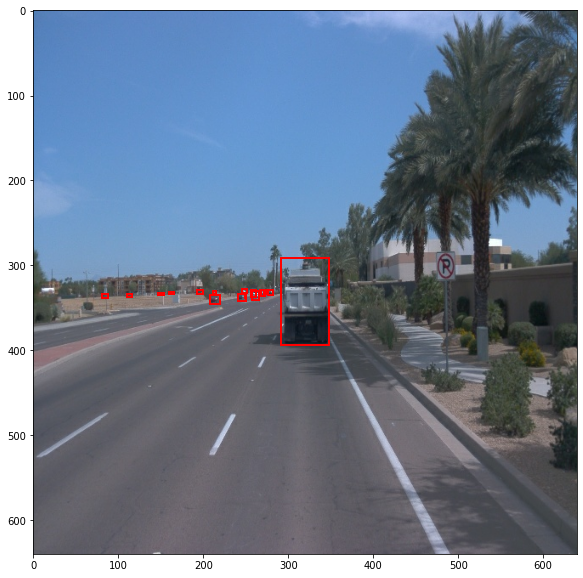

<Figure size 432x288 with 0 Axes>

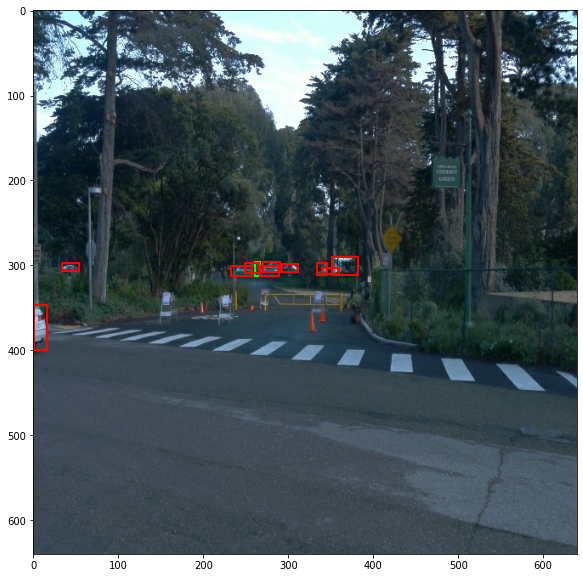

<Figure size 432x288 with 0 Axes>

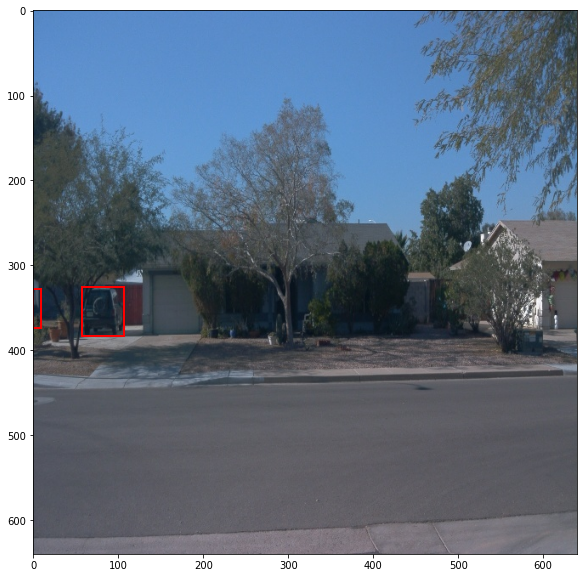

<Figure size 432x288 with 0 Axes>

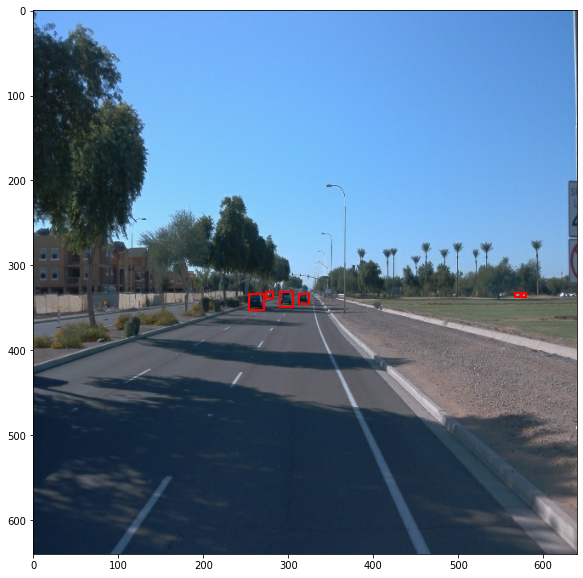

<Figure size 432x288 with 0 Axes>

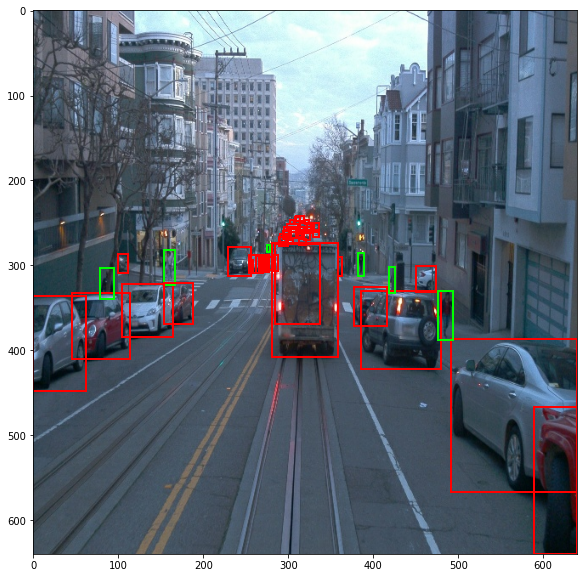

<Figure size 432x288 with 0 Axes>

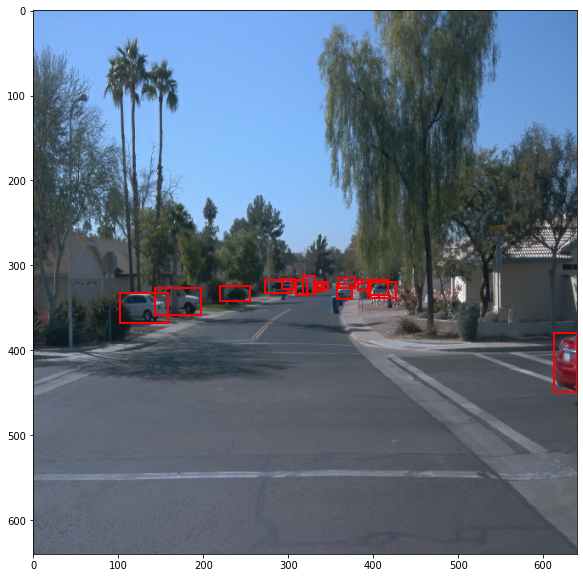

<Figure size 432x288 with 0 Axes>

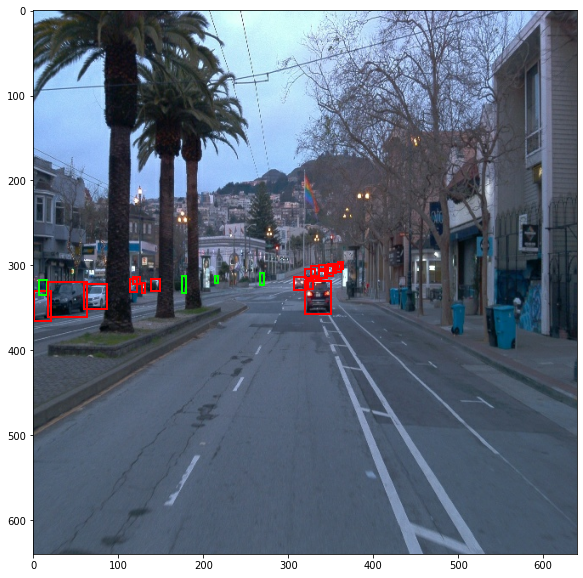

<Figure size 432x288 with 0 Axes>

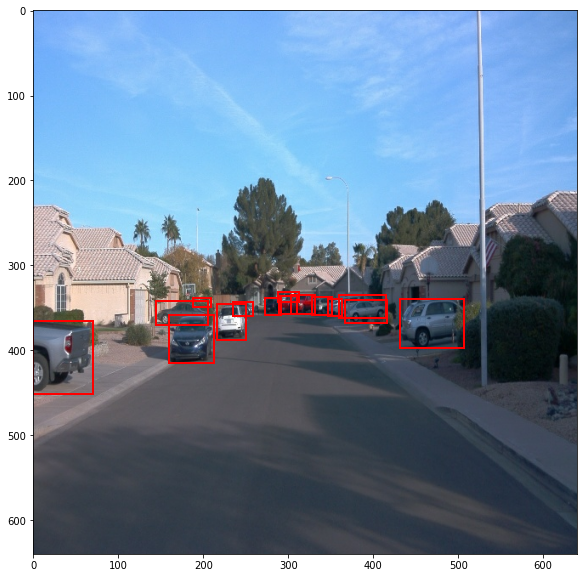

<Figure size 432x288 with 0 Axes>

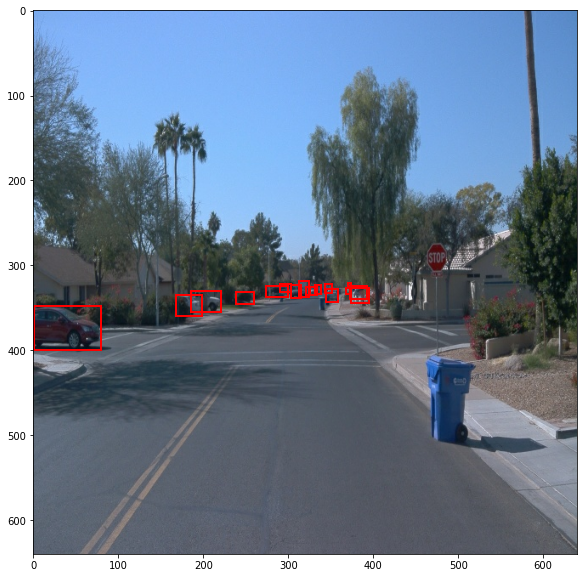

<Figure size 432x288 with 0 Axes>

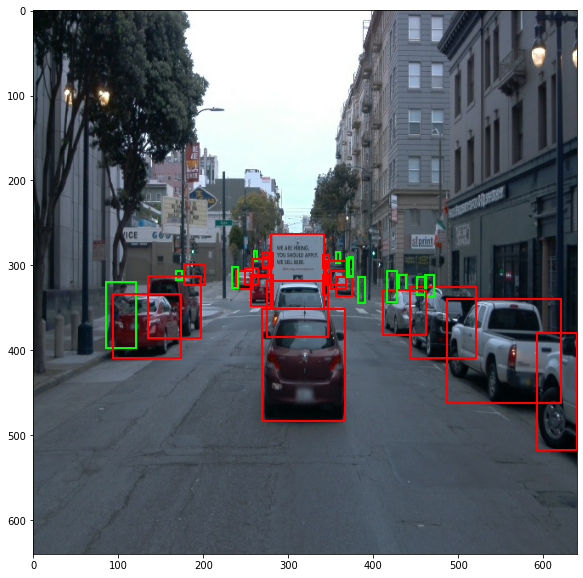

In [11]:
## STUDENT SOLUTION HERE
dataset = dataset.shuffle(1000)
dataset = dataset.take(10)
for batch in dataset:
    display_instances(batch)   

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [23]:
count = {1:0, 2:0, 4:0}
#'vehicle','pedestrian','cyclist'
empty = 0
for batch in dataset.take(100):
    classes = batch['groundtruth_classes'].numpy()
    for i in classes:
        count[i] += 1
        if np.all((classes==0)):
            empty +=1
        
print('distribution of classes -', count)
print('number of empty pic -', empty)

distribution of classes - {1: 157, 2: 44, 4: 0}
number of empty pic - 0
